<a href="https://colab.research.google.com/github/sofiiakasaeva/JupyterNotebooks/blob/main/DataAnalytics_HW1_Sofiia_Kasaeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в аналитику. Домашнее задание - 1

Мы будем работать с датасетом про покупки клиентов в онлайн-магазине. По характеристикам клиентов нам нужно понять, купит клиент товар или нет.

Целевая величина - Revenue (факт покупки).

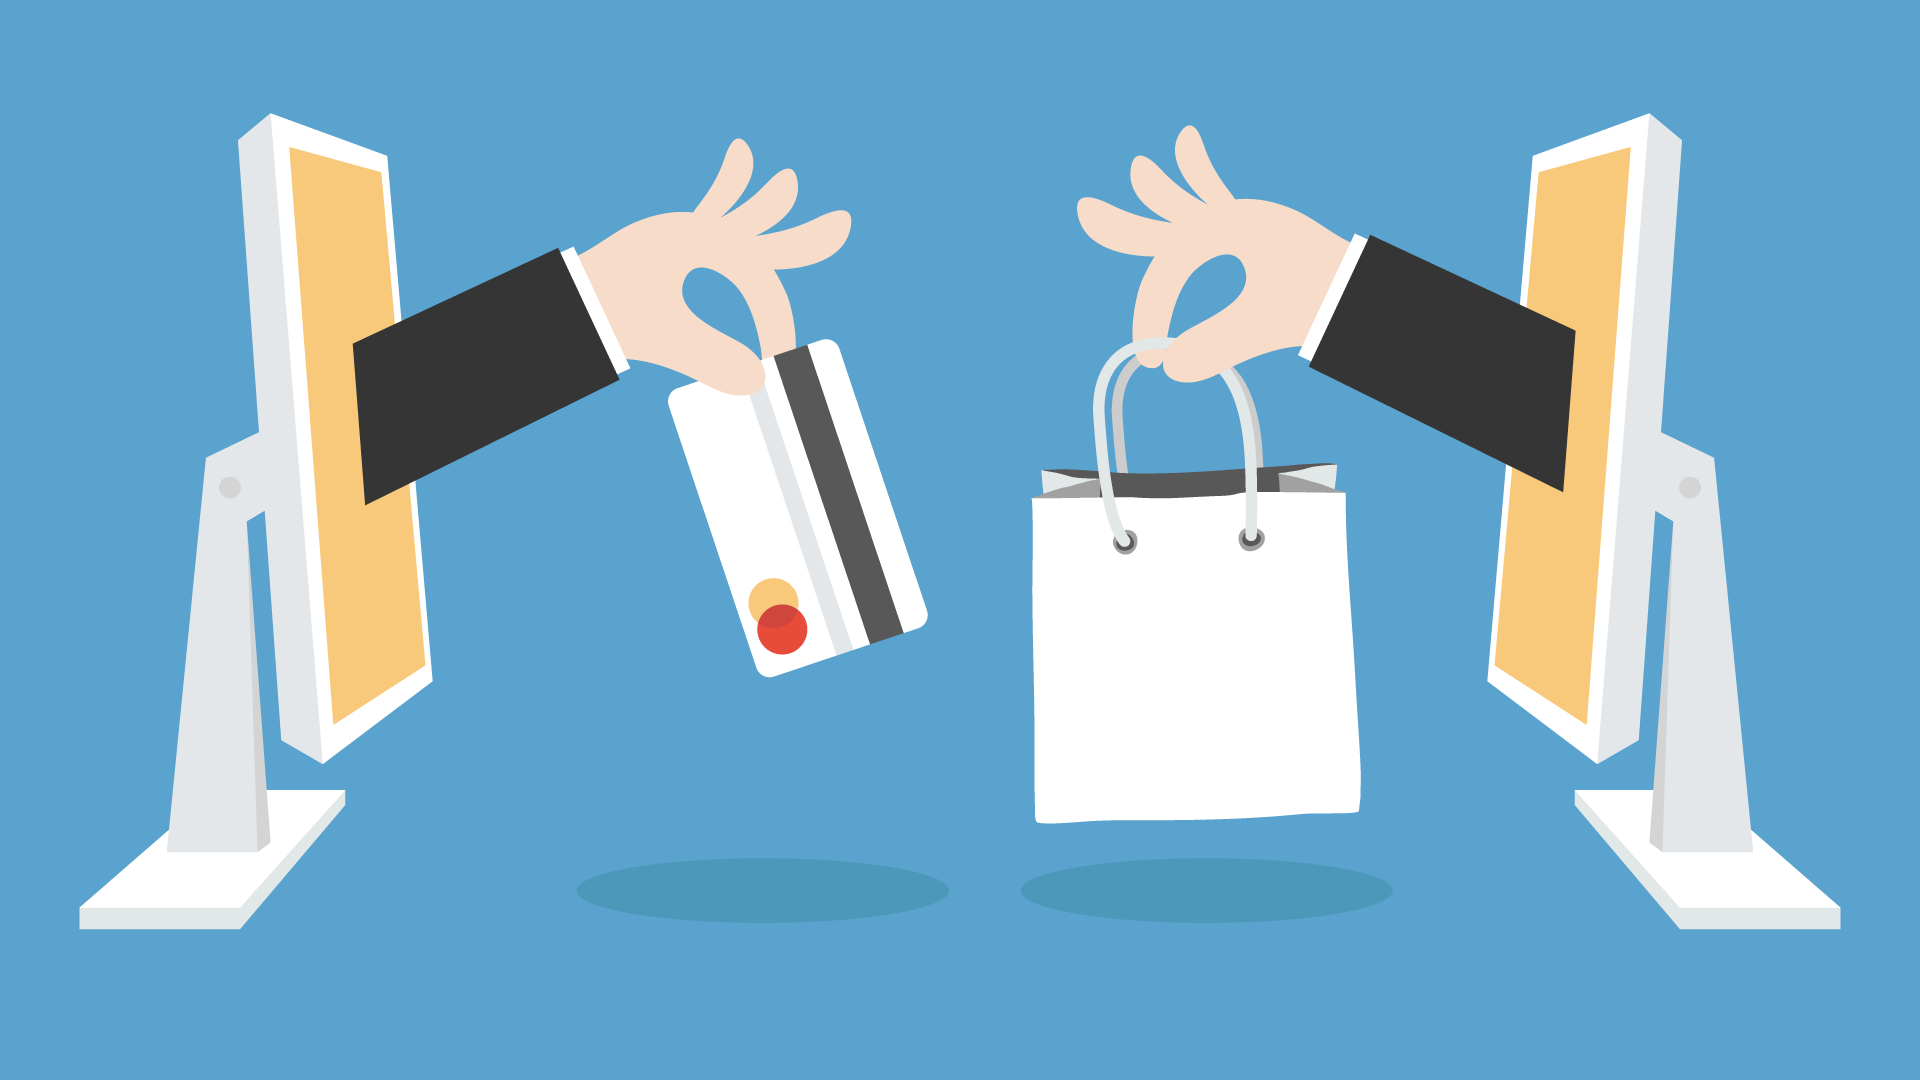

Задания ноутбука проверяются в гугл-формах в полуавтоматическом режиме. Ответы на вопросы, а также ссылку на ноутбук с выполненным домашнем задании в google colab прикрепите в [эту форму](https://docs.google.com/forms/d/e/1FAIpQLSdo_QG4Msqsvxhbd-GsAr8orBhByo1Sg9Y4RtzBX2w5FN43QQ/viewform?usp=sf_link).

* Задание 0 не оценивается
* Задания 1-16 весят 1 балл
* Задания 17-18 весят по 2 балла

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/main/datasets/online_shoppers_intention.csv"

In [ ]:
df = pd.read_csv(DATASET)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Описание данных

**Online Shoppers Purchasing Intention Dataset**

The `Revenue` attribute can be used as the class label.

* `Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related` and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

* `Bounce Rate`, `Exit Rate` and `Page Value` features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of Bounce Rate feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The Page Value feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

* The `Special Day` feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

* The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Задание 0

Изучите данные:

* Посмотрите на названия колонок

* Выведите на экран 10 случайных строк таблицы

* Посмотрите на размер таблицы

In [ ]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6703,3,103.600000,0,0.0,39,1003.380000,0.068293,0.086992,0.000000,0.0,Aug,1,1,1,3,Returning_Visitor,False,False
3430,2,59.833333,0,0.0,70,2509.250000,0.000000,0.006429,11.284114,0.0,May,2,2,3,1,Returning_Visitor,False,True
1638,0,0.000000,0,NaN,4,521.000000,0.100000,0.150000,0.000000,0.0,Mar,3,3,7,10,Returning_Visitor,False,False
6681,0,0.000000,1,105.8,44,868.163636,0.000000,0.036804,9.550627,0.0,Sep,2,6,4,2,Returning_Visitor,False,False
12303,0,0.000000,0,0.0,3,172.000000,0.000000,0.066667,0.000000,0.0,Dec,2,13,9,20,Returning_Visitor,False,False
4663,8,228.500000,0,0.0,5,64.500000,0.000000,0.028571,0.000000,0.0,May,1,2,3,5,New_Visitor,True,False
4475,0,0.000000,0,0.0,50,1149.433333,0.012000,0.026383,4.547600,0.0,May,4,1,1,4,Returning_Visitor,False,True
6021,0,0.000000,0,0.0,5,NaN,0.000000,0.000000,0.000000,0.0,Oct,1,1,3,4,Returning_Visitor,True,False
9550,1,12.000000,0,0.0,22,851.250000,0.004348,0.020290,0.000000,0.0,Nov,2,2,1,2,New_Visitor,False,False
2359,2,61.166667,0,NaN,47,901.250000,0.008333,0.025000,32.799375,0.0,May,2,4,6,4,Returning_Visitor,False,True


In [ ]:
df.shape

(12330, 18)

## Исследование данных

## Задание 1

В скольких столбцах таблицы есть пропущенные значения?

In [ ]:
df.isna().sum().astype(bool).sum(axis=0)

3

## Задание 2

В скольких числовых столбцах медиана больше среднего значения?

In [ ]:
df_numb = df.select_dtypes(include='number').columns
df_av = df[df_numb].mean()
df_med = df[df_numb].median()
np.where((df_av < df_med), 1, 0).sum()

0

## Задание 3

Сколько дублирующихся строк в данных? Ответьте на вопрос, а затем удалите дубликаты.

In [ ]:
print(df.duplicated().sum())
df = df.drop_duplicates()

109


## Однофакторный анализ

Начнём с анализа признака Product Related Duration.

## Задание 4

Постройте гистограмму распределения признака Product Related Duration.

Что можно сказать по гистограмме?

Text(0.5, 1.0, 'Распределение признака Product Related Duration')

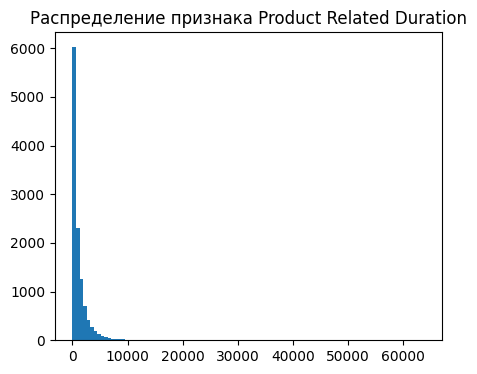

In [ ]:
plt.figure(figsize=(5,4))

plt.hist(df.ProductRelated_Duration, bins=100)

plt.title("Распределение признака Product Related Duration")

Вывод из гистограммы распределения признака Product Related Duration: в большинстве своем, пользователи мало времени проводят на сайтах, с увелечением времени нахождения на сайте уменьшается количество пользователей, которые столько времени проводят на сайте. Время проведения на сайте растягивается от 0 до 10000 минут. Распределение не нормальное. Распределение, вытянутое вправо.

## Задание 5

Какая доля среди всех клиентов провела 0 минут/секунд на страницах, посвященных продукту? Ответ переведите в проценты и округлите до целого числа.

In [ ]:
round(len(df[df.ProductRelated_Duration == 0.00000]) / len(df) * 100)

5

## Задание 6

Посмотрите как данный признак влияет на целевую переменную Revenue и сделайте выводы.


<ipython-input-55-54e85a671de9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df, palette='summer')


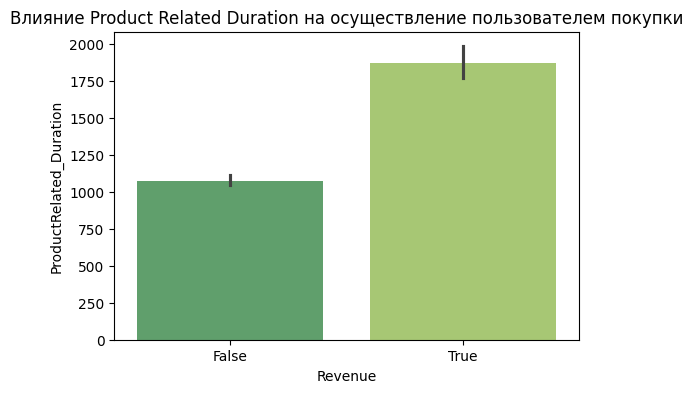

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='ProductRelated_Duration', data = df, palette='summer')
plt.title('Влияние Product Related Duration на осуществление пользователем покупки')
plt.show()

Вывод:


*   Время нахождения пользователя на странице влияет на осуществление покупки. В среднем, чем дольше пользователь находится на странице, тем вероятнее, что он совершит покупку




## Задание 7

Исходя из полученной гистограммы, сформулируйте гипотезу о взаимосвязи этих двух факторов. Затем выберите подходящий статистический тест (вам поможет любой мануал по статистике или генеративная модель), проведите его и проанализируйте результат (примите уровень значимости равным 0.95).

$H_0:$ гипотеза, что время нахождения пользователя на странице особо не влияет на осуществление покупки

$H_a:$ наша гипотеза: взаимосвязь между временем пребывания на сайте и осуществлением покупки существует. Чем дольше пользователь на сайте, тем вероятнее, что он совершит покупку

Воспользуемся тестом Манна-Уитни, так как мы сравниваем две группы, распределение не нормальное.

In [ ]:
from scipy.stats import mannwhitneyu

sample1 = df[df['Revenue'] == True]['ProductRelated_Duration'].dropna()
sample2 = df[df['Revenue'] == False]['ProductRelated_Duration'].dropna()

statistic, p_value = mannwhitneyu(sample1, sample2)

print("Статистика теста Манна-Уитни:", statistic)
print("p-значение:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значимо различаются")
else:
    print("Нет оснований отвергать нулевую гипотезу: средние не различаются")

Статистика теста Манна-Уитни: 12060461.5
p-значение: 1.162178315994545e-115
Отвергаем нулевую гипотезу: средние значимо различаются


## Задание 8

В поле для ответа запишите название статистического теста, который вы использовали, и обоснование, почему вы взяли именно этот тест.


Тест Манна-Уитни. Мы сравниваем 2 группы, одна категориальная, другая числовая. И у нас не нормальное распределение, поэтому нам подходит данный тест.

## Задание 9

Постройте матрицу корреляций всех числовых столбцов друг с другом. Используйте корреляцию Спирмена.

Какой столбец наиболее сильно коррелирует с Revenue? В ответе укажите значение коэффициента корреляции, округленного до сотых.

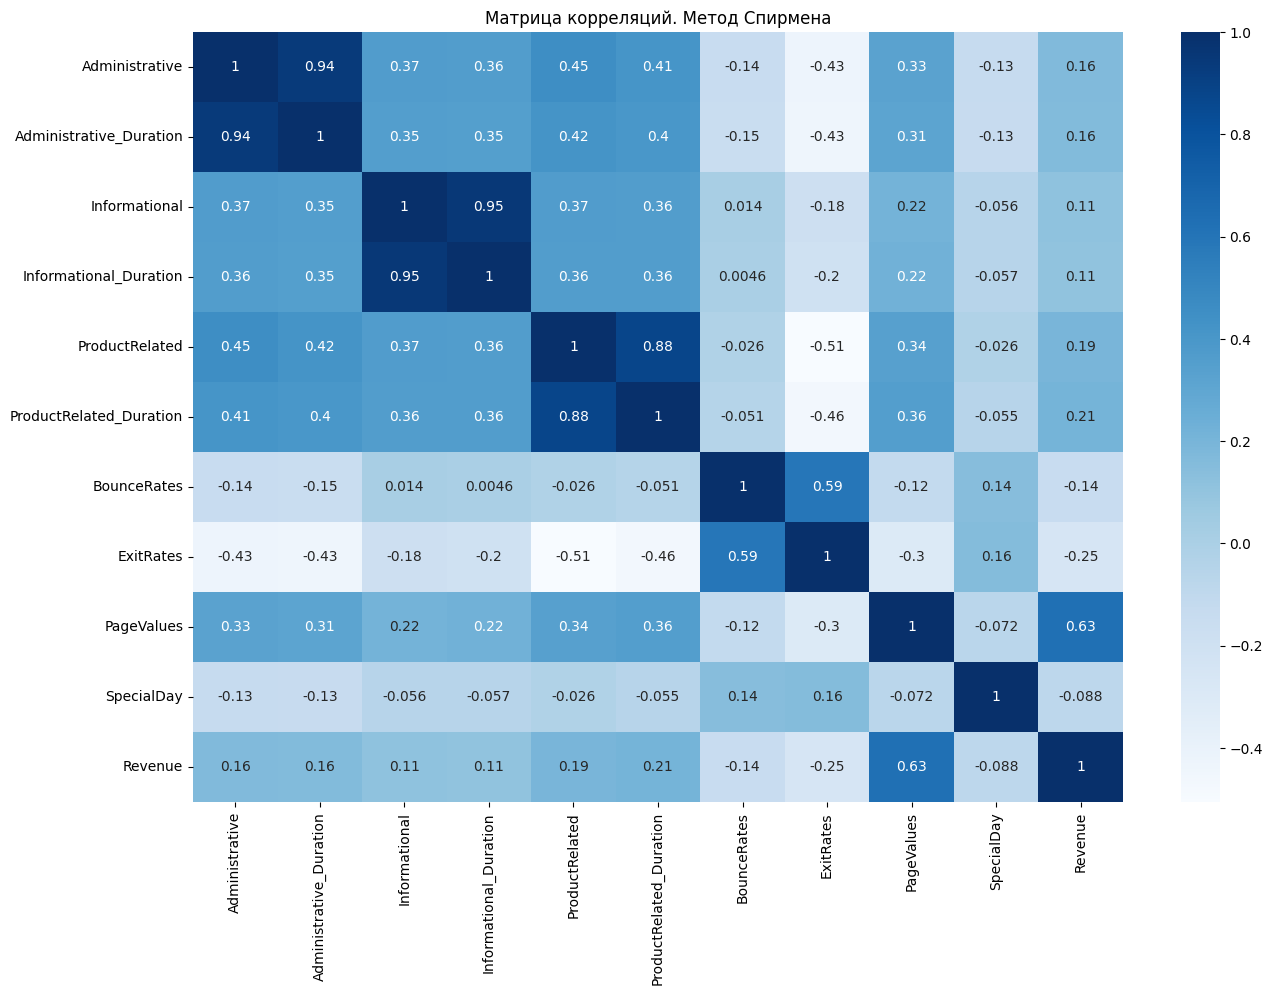

In [ ]:
corr = df.corr(method='spearman', numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap="Blues", annot=True)

plt.title('Матрица корреляций. Метод Спирмена')
plt.show()

In [ ]:
print("Более всего с Revenue коррелирует", corr.Revenue[:-1].idxmax())
print("Коэффициент корреляции", round(corr.Revenue[:-1].max(), 2))

Более всего с Revenue коррелирует PageValues
Коэффициент корреляции 0.63


## Задание 10

Возьмите столбец, который имеет корреляцию с Revenue, равную по модулю 0.14, и проведите анализ этого столбца по аналогии с тем, как вы действовали со столбцом ProductRelated_Duration.

Постройте гистограмму распределения столбца. Какое у него распределение?

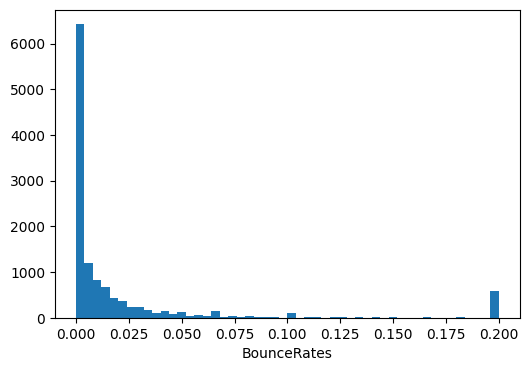

In [ ]:
col = corr['Revenue'][round(corr.Revenue.abs(), 2) == 0.14].index

plt.figure(figsize=(6,4))

plt.hist(df[col[0]], bins=50)

plt.xlabel(col[0])
plt.show()

Распределение растягивается от 0 до 0.2. Причем изначально процент идет на спад, а потом неравномерно встрчаются различные проценты. Так, мы видим, что достаточно много значений 0.2 в столбце Bounce Rates, и не очень понятно, с чем это связано. Распределение не нормальное. Распределение, вытянутое вправо.

## Задание 11

Посмотрите как данный признак влияет на целевую переменную Revenue и сделайте выводы.

<ipython-input-60-b28d6878ccb4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='BounceRates', data = df, palette='summer')


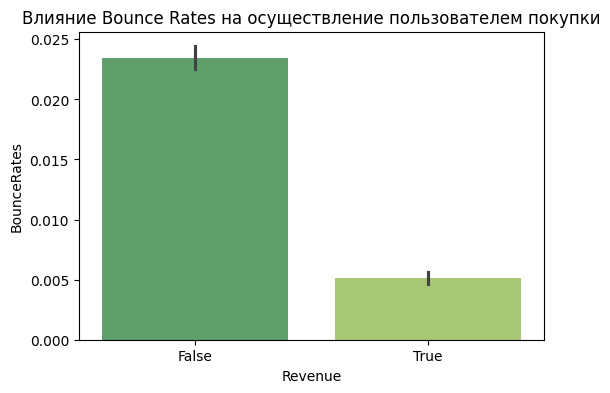

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='Revenue', y='BounceRates', data = df, palette='summer')
plt.title('Влияние Bounce Rates на осуществление пользователем покупки')
plt.show()

Вывод:
Bounce Rates влияют на Revenue: чем выше процент Bounce Rates, тем вероятнее, что покупка не осуществлена. Вполне логично, что, чем быстрее пользователи закрывают страницу, не производя на ней никаких действий, тем вероятнее, что покупка не будет осуществляться.

## Задание 12

Исходя из полученной гистограммы, сформулируйте гипотезу о взаимосвязи этих двух факторов. Затем выберите подходящий статистический тест (вам поможет любой мануал по статистике или генеративная модель), проведите его и проанализируйте результат (примите уровень значимости равным 0.95).

$H_0:$ гипотеза, что Bounce Rates особо не влияет на осуществление покупки

$H_a:$ наша гипотеза: взаимосвязь между Bounce Rates и осуществлением покупки существует

Воспользуемся тестом Манна-Уитни, так как мы сравниваем две группы, распределение не нормальное.

In [ ]:
from scipy.stats import mannwhitneyu

sample1 = df[df['Revenue'] == True]['BounceRates'].dropna()
sample2 = df[df['Revenue'] == False]['BounceRates'].dropna()

statistic, p_value = mannwhitneyu(sample1, sample2)

print("Статистика теста Манна-Уитни:", statistic)
print("p-значение:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значимо различаются")
else:
    print("Нет оснований отвергать нулевую гипотезу: средние не различаются")

Статистика теста Манна-Уитни: 7686519.5
p-значение: 2.632756637833401e-57
Отвергаем нулевую гипотезу: средние значимо различаются


## Задание 13

В поле для ответа запишите название статистического теста, который вы использовали, и обоснование, почему вы взяли именно этот тест.

Я выбрала тест Манна-Уитни, так как мы рассматриваем взаимосвязь категориального столбца с числовым. Распределение Bounce Rates не является нормальным и сравниваем мы две группы.

## Задание 14

Столбцы OperatingSystems, Browser, Region, TrafficType, Weekend - на самом деле категориальные, а не числовые. Измените тип этих столбцов на `object`.

На данных момент сколько теперь столбцов в таблице имеют тип `object`?

In [ ]:
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')
df['Weekend'] = df['Weekend'].astype('object')
print("Количество столбцов типа object : ", len(df.select_dtypes(include='object').columns))

Количество столбцов типа object :  7


## Задание 15

Переведите Revenue в категории по правилу: True -> Yes, False -> No.

После этого постройте аналог матрицы корреляций между парами категориальных столбцов с помощью V-меры Крамера.

Какой категориальный столбец сильнее всего "коррелирует" с Revenue?



In [ ]:
df['Revenue'] = df['Revenue'].map({False : 'No', True : 'Yes'})

In [ ]:
df_categ = df.select_dtypes(include='object')

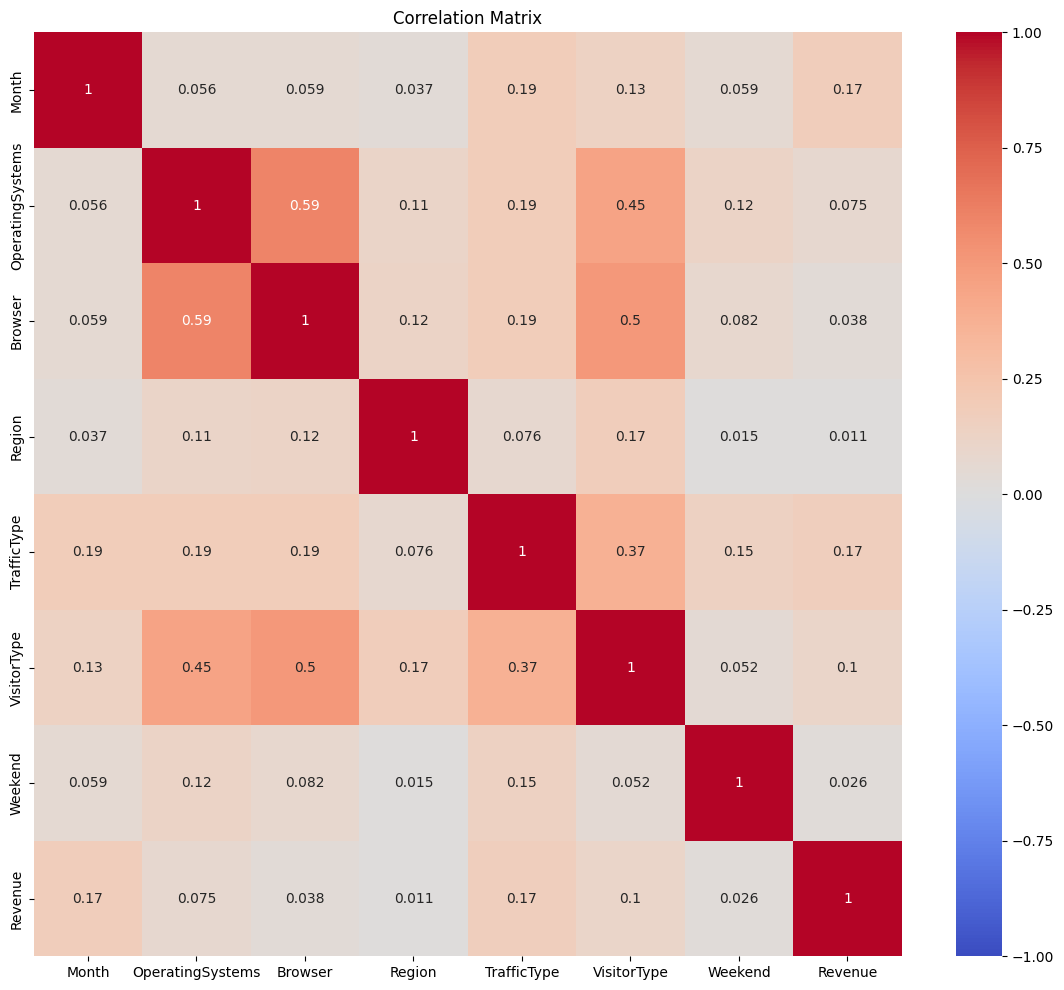

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def correlation_matrix(df):
    columns = df.columns
    n = len(columns)
    corr_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                corr_matrix[i, j] = 1
            else:
                corr_matrix[i, j] = cramers_v(df[columns[i]], df[columns[j]])
    return pd.DataFrame(corr_matrix, index=columns, columns=columns)

corr_matrix = correlation_matrix(df_categ)

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print("Более всего с Revenue коррелирует", corr_matrix.Revenue[:-1].idxmax())

Более всего с Revenue коррелирует Month


Верните Revenue обратно к типу Bool.

In [ ]:
df['Revenue'] = df['Revenue'].map({'No' : False, 'Yes' : True})

## Задание 16

Постройте матрицу $\phi_k$-корреляций всех столбцов в таблице.

Какой фактор сильнее всего коррелирует с Revenue? В ответе укажите значение корреляции, округленное до сотых.

In [ ]:
!pip install phik -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 3.8 MB/s eta 0:00:00


interval columns not set, guessing: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']


<Axes: >

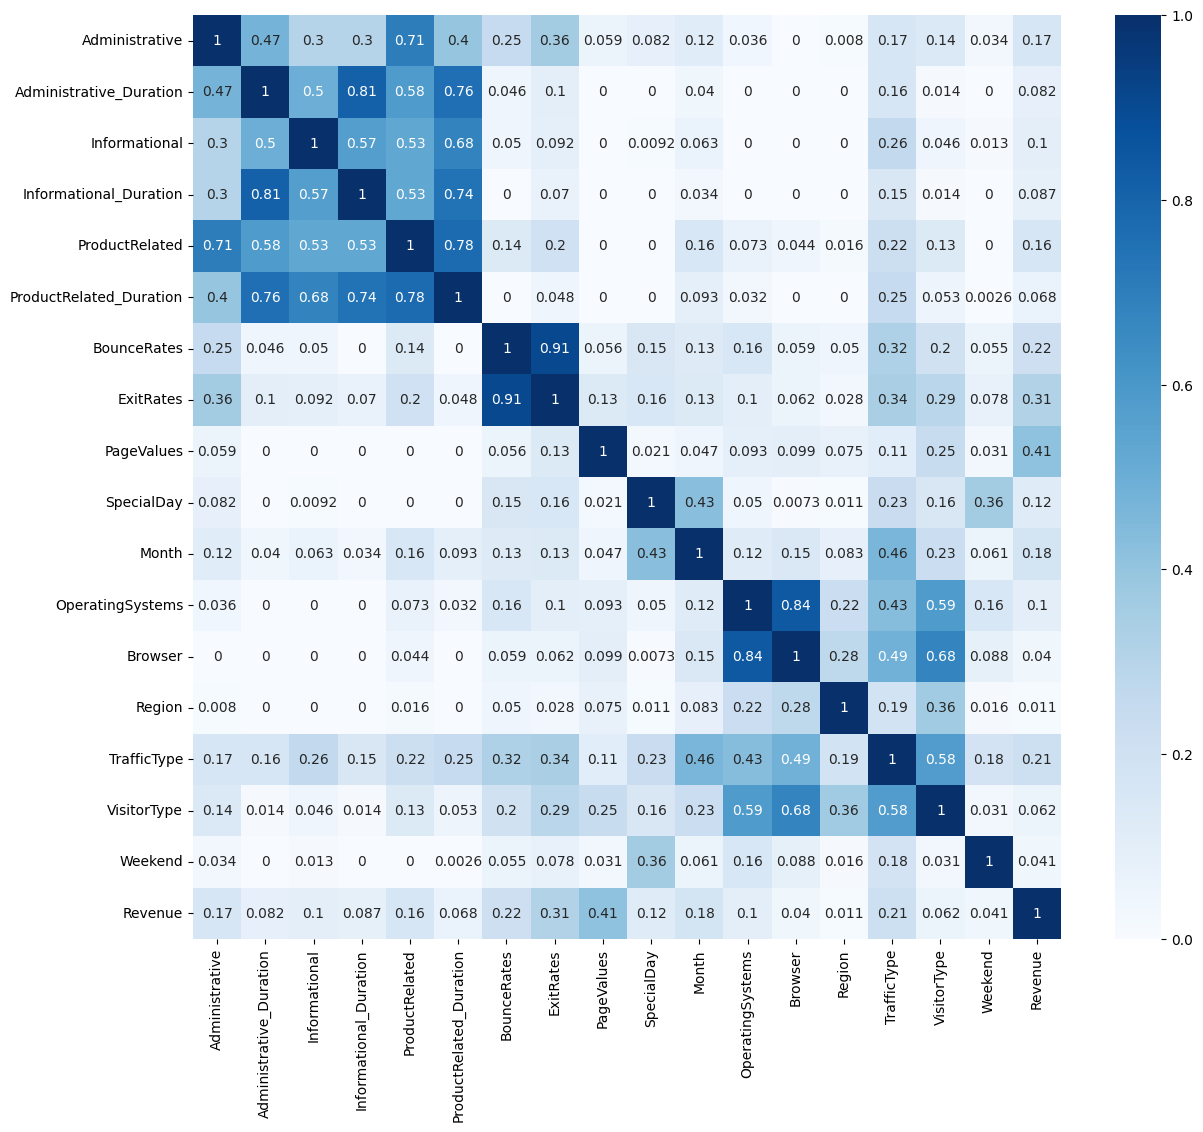

In [ ]:
import phik

plt.figure(figsize=(14,12))

ph_new = df.phik_matrix()

sns.heatmap(ph_new, cmap="Blues", annot=True)

In [ ]:
print("Более всего с Revenue коррелирует ", ph_new.Revenue[:-1].idxmax())
print("Коэффициент корреляции ", round(ph_new.Revenue[:-1].max(), 2))

Более всего с Revenue коррелирует  PageValues
Коэффициент корреляции  0.41


## Задание 17

Постройте любой из рассмотренных в первом занятии курса дашборд по данным, сохраните его в html и скачайте себе на компьютер.

Выложите файл с дашбордом на яндекс/гугл-диск и прикрепите ссылку на него в этом задании.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.8/17.8 MB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.3 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
df_copy = pd.read_csv(DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

profile_report.to_file("dashboard.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

ссылка на Дашборд: https://drive.google.com/file/d/1hJV3S4rtvXsbbqhXmHqALYpkqncFTiEP/view?usp=sharing

## Задание 18

Наша цель - понять, какие факторы сильнее всего влияют на Revenue и почему.

Проанализируйте построенный дашборд и ответьте текстом на вопросы:

1) Есть ли проблемы в данных (пропуски, дубли, выбросы, ошибочные значения)?

2) Какие три фактора имеют наиболее сильное влияние на Revenue?

3) Постарайтесь описать смысл каждого из этих факторов, а также для каждого из этих факторов объясните по смыслу, почему он сильно влияет на Revenue

4) Укажите два наиболее коррелирующих между собой фактора (без учета Revenue) и объясните, почему между ними такая большая корреляция?

Ответ:

1.   Да, есть пропуски и дубли. Дубли мы убирали в самом начале.
2.   Pages Values, Exit Rates, Months
3.   Page Values : это фактор, который считает, как часто страница была посещена до совершения транзакции. Если пользователь часто просматривает страницу, значит, вероятно, что он собирается приобрести данный товар. Отсюда и вытекает высокое влияние этого фактора на совершение покупки.

    Exit Rates : это процент пользователь, которые покидают данный сайт, после просмотра этой страницы. Чем выше процент, тем вероятнее, что эта страница негативно влияет на осуществление покупки. После просмотра данной страницы многие пользователи, вероятно, выходят с сайта, потому что не нашли то, что искали. Либо пользователи посчитали, что услуги, предоставляемые данным сайтом, недостаточно хороши и покинули его, не осуществив покупку.

    Month : этот фактор намного понятнее остальных. В каком месяце была просмотрена страница. Конечно, на некоторых товарах это никак не сказывается. Но сущетсвлует большое количество товаров, которые покупают в определенное время года, в определенный сезон. Именно поэтому month влияет на revenue.
4.  Наибольшая корреляция просматривается между Informational и Informational_Duration (0.951, информация из таблицы). Эти два фактора показывают количество посещений страницы и общее время, проведенное на этой странице. Так как при очередном посещении страницы время, проведенное на ней, только увеличивается, то очевидно, что эти признаки сильно коррелируют между собой. (похожая ситуация между признаками Administrative и Administrative_Duration, но у них корреляция 0.941)


## Полезные доп. материалы

* [Введение в проверку гипотез (кратко)](https://www.codecamp.ru/blog/hypothesis-testing/)

* [Введение в проверку гипотез (подробнее)](https://law.bsu.by/pub/11/barvenov_4.pdf)

* [Основные виды распределений](https://habr.com/ru/articles/801101/)